In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [9]:
len(y_test)

45

In [10]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()

In [12]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 2,
       0])

In [14]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [15]:
result

,0,1
0,1,1
1,1,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,0
9,2,2


In [16]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, lda.predict(X_test))

0.9555555555555556

In [18]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 3.54436660e+00,  1.54047440e-01,  4.35975020e+00,
        -5.26333235e-01,  2.34302005e-02,  1.05834468e+00,
         3.63462233e+00, -4.24219683e-02, -2.07946065e+00,
        -1.00736138e+00,  1.99690872e+00,  3.13320646e+00,
         1.33488082e-02],
       [-3.21319461e+00, -4.92368177e-01, -6.12107636e+00,
         2.28934199e-01, -1.19440668e-02, -1.73171163e+00,
         2.04541777e+00,  3.58672531e+00,  1.73602809e+00,
        -4.35560027e-01,  5.45654168e+00,  3.04082336e-01,
        -9.14355527e-03],
       [-3.52307246e-01,  4.64771209e-01,  2.51846478e+00,
         3.90172765e-01, -1.49830654e-02,  9.45925697e-01,
        -7.63020397e+00, -4.82536904e+00,  4.09687075e-01,
         1.93599410e+00, -1.00895045e+01, -4.59149846e+00,
        -5.35301630e-03]])

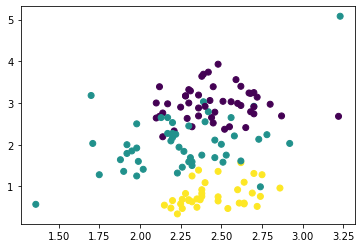

In [19]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [20]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

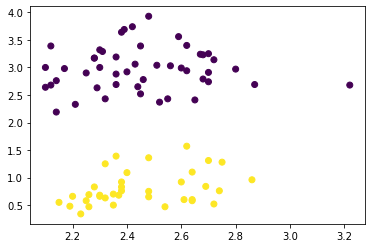

In [21]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [23]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [24]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45354167, 2.974375  ],
       [2.45055556, 0.80444444]])

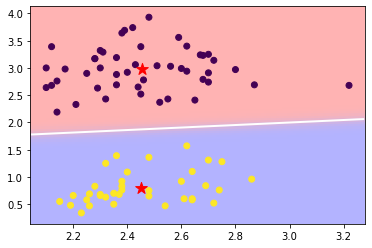

In [25]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [26]:
# второй признак в 5 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  3.9494402 , -17.16931072]])

In [27]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [28]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [29]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [32]:
lr.predict(small_test)

array([0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0])

In [33]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [34]:
lr.coef_

array([[ 0.16226121, -3.16986305]])

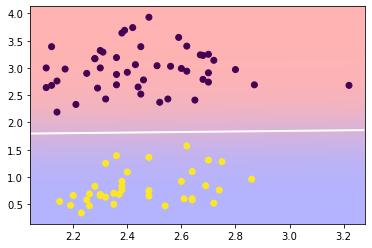

In [35]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [59]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [72]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=10)

In [73]:
X

array([[-2.74985209e+01, -9.49557583e+00],
       [ 2.58904054e+00, -9.01466135e+00],
       [-3.37970864e-01,  2.15648020e+01],
       [ 3.50107845e+00,  1.44227286e+01],
       [ 7.55144246e+00,  2.56433645e+01],
       [-2.67597541e+01,  1.53140182e+01],
       [ 3.30887820e+00,  8.77185138e+00],
       [-1.57156703e+01,  5.40604822e+00],
       [ 5.48958247e+00,  1.84667134e+00],
       [ 1.08389267e+01,  1.32372519e+01],
       [ 2.88763636e+01,  1.36137697e+01],
       [ 4.31462586e+00,  1.03817511e+01],
       [-6.03914537e+00,  1.01082045e+01],
       [ 2.37434560e+01, -4.93022452e+00],
       [-1.34893239e+01,  1.64325128e+01],
       [-7.93489433e+00,  1.55600809e+01],
       [-5.66153215e+00,  5.41973241e+00],
       [-2.59391716e+00,  9.57145431e+00],
       [-3.32647454e+00,  1.45803124e+01],
       [ 1.32625632e+01,  2.16362247e-02],
       [ 2.12549006e+00, -5.77199907e-01],
       [-1.77239399e+01,  3.27608007e+01],
       [-2.25082774e+01,  4.50614097e+00],
       [-1.

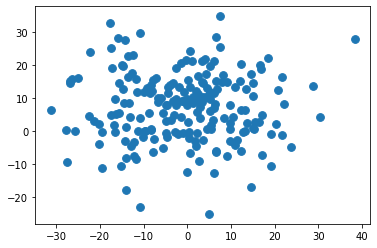

In [74]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [75]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [77]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-2.10535698, -1.60412713],
       [ 0.28481776, -1.55793206],
       [ 0.05229414,  1.37943089],
       [ 0.35727062,  0.69338675],
       [ 0.67903408,  1.77120423],
       [-2.04666889,  0.7790011 ],
       [ 0.34200211,  0.15058201],
       [-1.16931995, -0.172726  ],
       [ 0.51523863, -0.51462807],
       [ 0.94019388,  0.57951374],
       [ 2.37309918,  0.6156808 ],
       [ 0.42189934,  0.3052237 ],
       [-0.40061074,  0.27894771],
       [ 1.96533778, -1.16559445],
       [-0.99245759,  0.88644002],
       [-0.55121022,  0.80263707],
       [-0.37061291, -0.17141154],
       [-0.12691965,  0.22738925],
       [-0.18511447,  0.70852373],
       [ 1.13272909, -0.68993495],
       [ 0.24799302, -0.74745719],
       [-1.32885814,  2.45488181],
       [-1.70892891, -0.25916814],
       [-0.02689838, -0.28068366],
       [ 0.1292067 , -1.33699364],
       [ 0.59404042,  2.03659544],
       [ 0.71616179,  0.72250217],
       [-0.61954743, -0.17135787],
       [ 0.27730409,

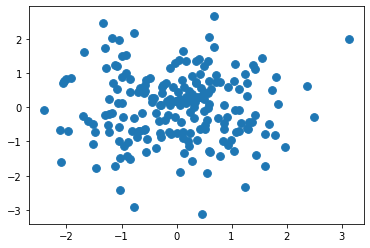

In [78]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [79]:
from sklearn.cluster import KMeans

In [93]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

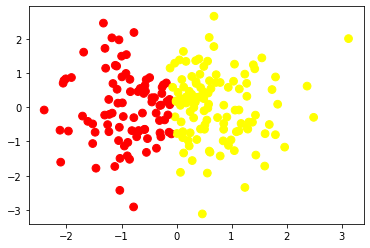

In [94]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [82]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

C:\Users\PC\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


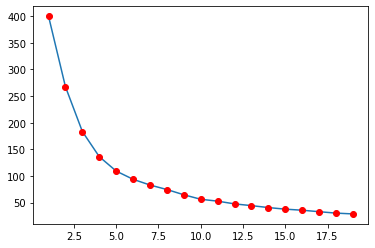

In [83]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [86]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

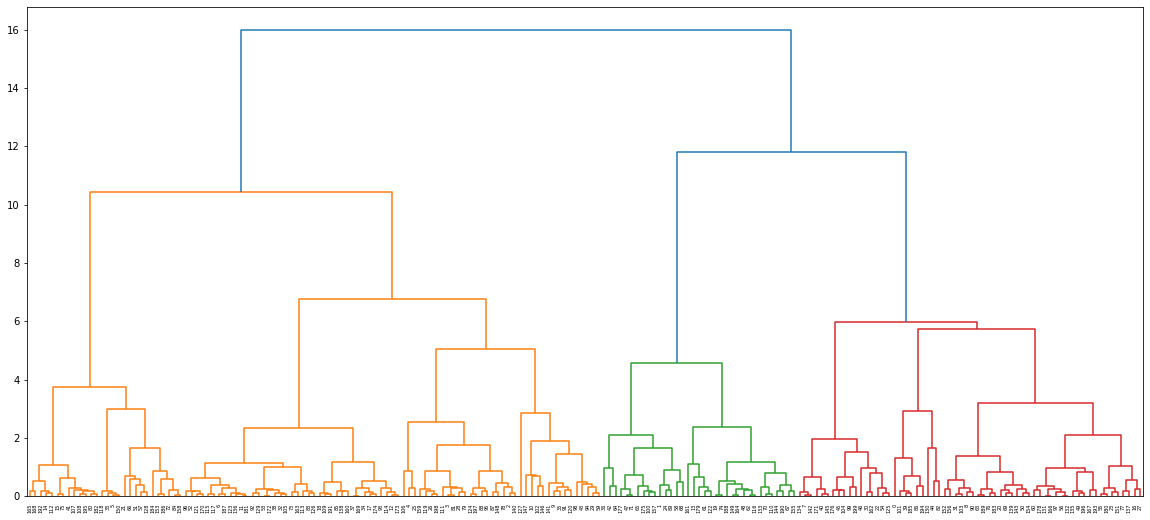

In [89]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [90]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [91]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0], dtype=int64)

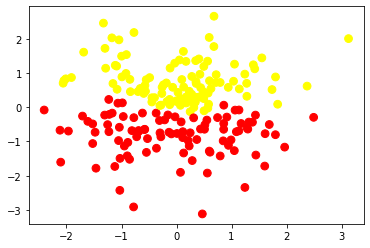

In [92]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [95]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,-27.498521,-9.495576,0
1,2.589041,-9.014661,1
2,-0.337971,21.564802,1
3,3.501078,14.422729,1
4,7.551442,25.643364,1
...,...,...,...
195,-8.100709,12.042799,0
196,-12.136571,-3.489837,0
197,3.383078,21.349030,1
198,8.989862,14.716794,1
